In [199]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [200]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip\
  -O /tmp/rockpaperscissors.zip

--2020-07-21 16:41:07--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.73MB/s    in 59s     

2020-07-21 16:42:07 (5.20 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [201]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [202]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
os.listdir(base_dir)

['rock', 'paper', 'scissors', 'README_rpc-cv-images.txt']

In [252]:
ImageDataGenerator?

In [224]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.4)
#2188

In [225]:
train_datagen.flow_from_directory?

In [226]:
train_generator = train_datagen.flow_from_directory(
        base_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        shuffle=True,
        subset="training")

Found 1314 images belonging to 3 classes.


In [227]:
validation_generator = train_datagen.flow_from_directory(
        base_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        shuffle=True,
        subset="validation")

Found 874 images belonging to 3 classes.


In [228]:
#Penggunaan callbacks
from tensorflow.keras.callbacks import EarlyStopping

In [240]:
EarlyStopping?

In [241]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2,verbose=2, mode='auto')

In [242]:
tf.keras.models.Sequential?

In [243]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')#klasifikasi tiga gambar
])

In [244]:
model.compile?

In [245]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [246]:
model.fit?

In [247]:
fit = model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,  
      verbose=2,
      callbacks=[early_stop])

Epoch 1/20
25/25 - 1s - loss: 1.1392 - accuracy: 0.3700 - val_loss: 1.0939 - val_accuracy: 0.3500
Epoch 2/20
25/25 - 1s - loss: 1.0766 - accuracy: 0.4100 - val_loss: 1.0509 - val_accuracy: 0.4500
Epoch 3/20
25/25 - 1s - loss: 1.0822 - accuracy: 0.3878 - val_loss: 1.4834 - val_accuracy: 0.3500
Epoch 4/20
25/25 - 1s - loss: 1.1330 - accuracy: 0.3800 - val_loss: 0.9926 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 1s - loss: 1.1087 - accuracy: 0.5800 - val_loss: 1.0896 - val_accuracy: 0.3500
Epoch 6/20
25/25 - 1s - loss: 1.0051 - accuracy: 0.5700 - val_loss: 0.9479 - val_accuracy: 0.5500
Epoch 7/20
25/25 - 1s - loss: 0.8246 - accuracy: 0.6500 - val_loss: 0.6127 - val_accuracy: 0.7000
Epoch 8/20
25/25 - 1s - loss: 0.7205 - accuracy: 0.6700 - val_loss: 0.7635 - val_accuracy: 0.7500
Epoch 9/20
25/25 - 1s - loss: 0.6079 - accuracy: 0.7000 - val_loss: 0.5685 - val_accuracy: 0.8500
Epoch 10/20
25/25 - 1s - loss: 0.4284 - accuracy: 0.8400 - val_loss: 0.6439 - val_accuracy: 0.8500
Epoch 11/20
25/25 -

In [248]:
train_loss, train_acc = model.evaluate_generator(train_generator, steps=16)
validation_loss, test_acc = model.evaluate_generator(validation_generator, steps=16)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.953, Test: 0.922


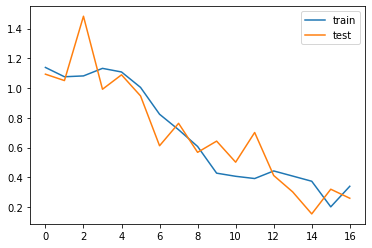

None


In [249]:
plt.plot(fit.history['loss'], label='train')
plt.plot(fit.history['val_loss'], label='test')
plt.legend()
print(plt.show())

In [250]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving 0RA9rcrv8iVvuDDU.png to 0RA9rcrv8iVvuDDU (1).png
0RA9rcrv8iVvuDDU.png
kertas


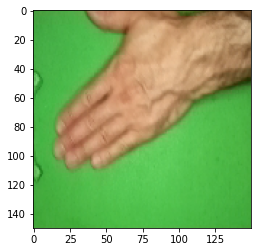

In [251]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('kertas')
  elif classes[0][1]==1:
    print('batu')
  elif classes[0][2]==1:
    print('gunting')
  else:
    print('tidak diketahui')